# Regresión con Árboles de Decisión

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. 
Estos datos se recopilaron en 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.
Las características son:
- CRIM: Índice de criminalidad per capita
- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
- INDUS: Proporción de superficie de negocio no minorista.
- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a las autopistas radiales
- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
- PTRATIO: Ratio de alumnos por profesor
- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana
- LSTAT: Porcentaje de población de “estatus de bajo nivel”
- MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares)

El objetivo es predecir la mediana del valor de las viviendas (MEDV), basándose en las demás características

## Importar las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# cargar los datos
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
# Transformar a dataframe para visualizar
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['TARGET'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#Seleccionamos solamente la columna 6 del dataset
X_adr = data[:, np.newaxis, 5]

In [5]:
#Definimos los datos correspondientes a las etiquetas
y_adr = target

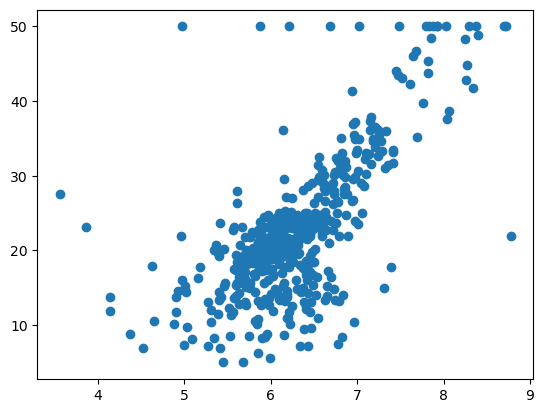

In [6]:
#Graficamos los datos correspondientes
plt.scatter(X_adr, y_adr)
plt.show()

In [7]:
#Separamos los datos en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [8]:
#Definimos el algoritmo a utilizar
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth = 5)

In [9]:
#Entrenamos el modelo
adr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [10]:
#Realizamos una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[19.1815534  43.13333333 11.62857143 37.6        20.38       29.28
 19.1815534  49.5        19.1815534  11.25       25.15853659 29.28
 19.1815534  20.38       19.1815534  16.67945205 49.5        16.67945205
 19.1815534  19.1815534  43.13333333 19.93846154 29.28       20.38
 20.38       20.38       33.26428571 33.26428571 33.26428571 19.1815534
 33.26428571 11.62857143 19.1815534  33.26428571 20.38       16.67945205
 33.26428571 19.1815534  33.26428571 16.67945205 19.1815534  19.1815534
 43.13333333 16.67945205 19.1815534  33.26428571 19.1815534  16.67945205
 16.67945205 19.1815534  20.38       20.38       16.67945205 20.38
 16.67945205 19.1815534  25.15853659 19.1815534  16.67945205 20.38
 20.38       19.1815534  25.15853659 20.38       20.38       25.15853659
 16.67945205 19.93846154 25.15853659 16.67945205 19.1815534  19.1815534
 19.1815534  19.1815534  19.1815534  16.67945205 16.67945205 19.93846154
 20.38       29.18181818 25.15853659 20.38       25.15853659 16.67945205
 25.1585365

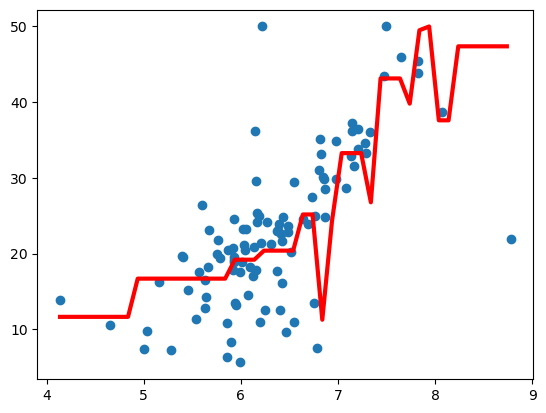

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.7021830676400371


In [11]:
#Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))